In [1]:
import torch
import numpy as np

In [2]:
x = torch.empty(5, 3, dtype=torch.long)

In [3]:
print(x)

tensor([[ 1.4052e+14,  1.4052e+14,  4.2950e+09],
        [ 7.9469e+18,  7.5985e+18,  6.0619e+18],
        [ 8.4620e+18,  2.3183e+18,  8.7427e+18],
        [ 7.3095e+18,  5.4854e+18,  7.0200e+18],
        [ 8.2459e+18,  7.2354e+18,  7.5994e+18]])


In [4]:
x = (torch.rand(5,3)*10).numpy()
x

array([[0.36969066, 4.086672  , 4.522335  ],
       [5.16241   , 6.779187  , 5.187111  ],
       [1.1452442 , 8.036255  , 4.611992  ],
       [1.5014774 , 4.9700885 , 6.6579576 ],
       [4.654543  , 2.099005  , 5.334507  ]], dtype=float32)

In [5]:
x = torch.zeros(5,3, dtype=torch.long)
x

tensor([[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]])

In [6]:
x = torch.tensor([5.500, 3.000])

In [32]:
x

tensor([ 5.5000,  3.0000])

In [50]:
x = x.new_ones(5,3,dtype=torch.double)
x

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]], dtype=torch.float64)

In [34]:
x = torch.rand_like(x, dtype=torch.float)
x

tensor([[ 0.0019,  0.0641,  0.7110],
        [ 0.0034,  0.6253,  0.4681],
        [ 0.7515,  0.4792,  0.1784],
        [ 0.5597,  0.4501,  0.7150],
        [ 0.0692,  0.5543,  0.1168]])

In [35]:
x.size()

torch.Size([5, 3])

In [36]:
y = torch.rand(5,3)
print(x+y)

tensor([[ 0.5783,  0.4071,  0.8737],
        [ 0.7338,  0.8523,  1.3744],
        [ 1.2146,  0.6825,  0.2049],
        [ 1.0835,  0.6194,  0.8378],
        [ 0.5443,  0.8218,  1.0302]])


In [37]:
print(torch.add(x, y))

tensor([[ 0.5783,  0.4071,  0.8737],
        [ 0.7338,  0.8523,  1.3744],
        [ 1.2146,  0.6825,  0.2049],
        [ 1.0835,  0.6194,  0.8378],
        [ 0.5443,  0.8218,  1.0302]])


In [38]:
print(x[:, 1])

tensor([ 0.0641,  0.6253,  0.4792,  0.4501,  0.5543])


In [43]:
x = torch.rand(4,4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())


torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [48]:
x = torch.randn(2)
print(x[0])
print(x[0].item())

tensor(-0.7626)
-0.7626188397407532


In [52]:
a = torch.ones(5)
print(a)

tensor([ 1.,  1.,  1.,  1.,  1.])


In [54]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [55]:
a.add_(1)

tensor([ 2.,  2.,  2.,  2.,  2.])

In [56]:
print(b)

[2. 2. 2. 2. 2.]


In [57]:
a = np.ones(5)

In [58]:
b = torch.from_numpy(a)


In [60]:
np.add(a, 1, out=a)

array([2., 2., 2., 2., 2.])

In [61]:
b

tensor([ 2.,  2.,  2.,  2.,  2.], dtype=torch.float64)

# Autograd

In [7]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[ 1.,  1.],
        [ 1.,  1.]])


In [8]:
y = x+2
print(y)

tensor([[ 3.,  3.],
        [ 3.,  3.]])


In [9]:
print(y.grad_fn)

In [10]:
z = y*y*3
out = z.mean()

In [11]:
print(z, out)

tensor([[ 27.,  27.],
        [ 27.,  27.]]) tensor(27.)


In [19]:
a = torch.randn(2, 2)
print(a.requires_grad)

False


In [20]:
a = ((a * 3) / (a - 1))
a

tensor([[  0.5338,  -3.7372],
        [-44.0322,   6.5332]])

In [21]:
print(a.requires_grad)

False


In [22]:
a.requires_grad_(True)

tensor([[  0.5338,  -3.7372],
        [-44.0322,   6.5332]])

In [23]:
print(a.requires_grad)

True


In [24]:
b = (a * a).sum()

In [25]:
#print(b.grad_fn()) #why kernel stops?

In [26]:
out.backward()

In [27]:
print(x.grad)

tensor([[ 4.5000,  4.5000],
        [ 4.5000,  4.5000]])


In [33]:
x = torch.randn(3, requires_grad=True)
x

tensor([ 1.9004,  0.7044,  1.1517])

In [34]:
y = x*2
y

tensor([ 3.8008,  1.4089,  2.3033])

In [35]:
while y.data.norm() < 1000:
    y = y*2
print(y)

tensor([ 973.0131,  360.6685,  589.6523])


In [38]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([  51.2000,  512.0000,    0.0512])


In [2]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
np_data = np.arange(6).reshape((2,3))
np_data

array([[0, 1, 2],
       [3, 4, 5]])

In [46]:
torch_data = torch.from_numpy(np_data.astype(np.float32))

In [47]:
torch_data

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.]])

In [49]:
tensortoarray = torch_data.data.numpy()
tensortoarray

array([[0., 1., 2.],
       [3., 4., 5.]], dtype=float32)

In [52]:
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)
print(
    '\nabs',
    '\nnumpy: ', np.abs(data),          # [1 2 1 2]
    '\ntorch: ', torch.abs(tensor)      # [1 2 1 2]
)


abs 
numpy:  [1 2 1 2] 
torch:  tensor([ 1.,  2.,  1.,  2.])


In [58]:
(tensor.size())

torch.Size([4])

In [64]:
tensor = torch.FloatTensor([[1,2],[3,4]]) 
tensor1 = torch.FloatTensor([[3,4], [5,6]])
variable = Variable(tensor, requires_grad = True)
var1 = Variable(tensor1, requires_grad = True)
var1

tensor([[ 3.,  4.],
        [ 5.,  6.]])

In [65]:
t_out = torch.mean(tensor*tensor)
v_out = torch.mean(variable*variable)
print(t_out)
print(v_out)

tensor(7.5000)
tensor(7.5000)


In [66]:
v_out.backward()
print(variable.grad)
print(var1.grad)
print(variable)     
print(variable.data)    
print(variable.data.numpy()) 

tensor([[ 0.5000,  1.0000],
        [ 1.5000,  2.0000]])
None
tensor([[ 1.,  2.],
        [ 3.,  4.]])
tensor([[ 1.,  2.],
        [ 3.,  4.]])
[[1. 2.]
 [3. 4.]]


In [70]:
x = torch.linspace(-5, 5, 200)
x = Variable(x)
x_np = x.data.numpy()

In [71]:
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

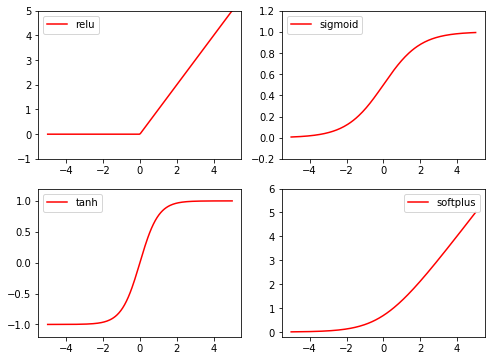

In [72]:
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

# Regression

In [3]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())

In [4]:
X = Variable(x, requires_grad=True)
Y = Variable(y)

In [5]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)   # hidden layer
        self.output = torch.nn.Linear(n_hidden1, n_output)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = self.output(x)             # linear output
        return x

In [6]:
net = Net(n_feature=1, n_hidden1=10, n_output=1)     # define the network
print(net) 

Net(
  (hidden1): Linear(in_features=1, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)


In [7]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

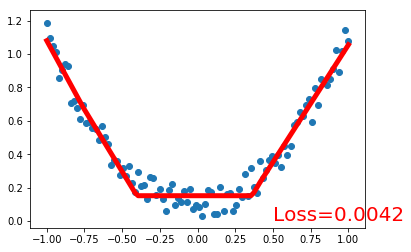

In [8]:
for t in range(100):
    prediction = net(X)     # input x and predict based on x

    loss = loss_func(prediction, Y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 1 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(X.data.numpy(), Y.data.numpy())
        plt.plot(X.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})

# NeuralNet

In [189]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)  

In [190]:
print (x.size(), y.size())

torch.Size([200, 2]) torch.Size([200])


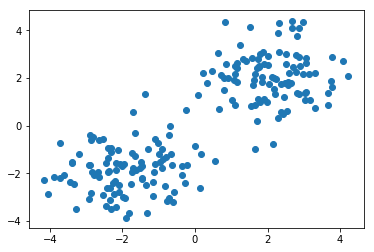

In [191]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1])

In [192]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [193]:
net = Net(n_feature=2, n_hidden=10, n_output=2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [194]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
loss_func = torch.nn.CrossEntropyLoss()

In [195]:
x = Variable(x, requires_grad = True)
y = Variable(y)

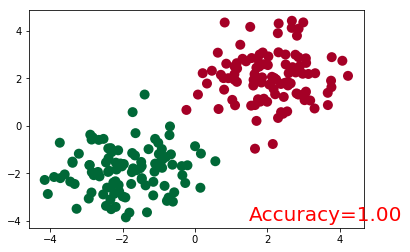

In [201]:
for t in range(1):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    
    if t % 2 == 0:
        # plot and show learning process
        # plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.show()